In [78]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [81]:
!pip install mediapipe opencv-python 

In [82]:
image_files = ['KakaoTalk_20220811_120728313.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for idx, file in enumerate(image_files):
    #이미지를 읽어들이고, 보기 편하게 이미지 좌우 반전
    image = cv2.flip(cv2.imread(file),1)
    #작업 전에 BGR -> RGB 변환
    results = hands.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    
    # 손으로 프린트하고 이미지에 손 랜드마크를 그립니다.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    x=[]
    y=[]
    z=[]
    for hand_landmarks in results.multi_hand_landmarks:
        print('hand_landmarks:', hand_landmarks)
        for point in results.multi_hand_landmarks[0].landmark:
            x.append(point.x)
            y.append(point.y)
            z.append(point.z)
        mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
        frame_array = np.vstack((x,y,z))

Handedness: [classification {
  index: 1
  score: 0.9827527
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.49806187
  y: 0.6956992
  z: -6.1319713e-07
}
landmark {
  x: 0.45849788
  y: 0.62977904
  z: -0.00051774835
}
landmark {
  x: 0.459243
  y: 0.56419224
  z: -0.0035556576
}
landmark {
  x: 0.46159515
  y: 0.50713444
  z: -0.011713914
}
landmark {
  x: 0.45572177
  y: 0.4547549
  z: -0.017907128
}
landmark {
  x: 0.51791567
  y: 0.50776315
  z: 0.01924095
}
landmark {
  x: 0.49483576
  y: 0.4447164
  z: -0.0040618144
}
landmark {
  x: 0.4681295
  y: 0.47265112
  z: -0.016787041
}
landmark {
  x: 0.4611864
  y: 0.50879693
  z: -0.021173323
}
landmark {
  x: 0.5353606
  y: 0.5113298
  z: 0.00981908
}
landmark {
  x: 0.4940339
  y: 0.4506298
  z: -0.015473259
}
landmark {
  x: 0.46767348
  y: 0.5075582
  z: -0.020735433
}
landmark {
  x: 0.47352076
  y: 0.5411186
  z: -0.016865471
}
landmark {
  x: 0.54937637
  y: 0.5210915
  z: -0.004001352
}
landmark {
  x: 0.4972689
  y: 0.

In [83]:
df = frame_array

 # __________ 구분

In [2]:
import numpy as np
import pandas as pd
df = np.load('Right_DLB_p_1.npy')

In [1]:
cd C:/Users/82102/Datasets/session3

C:\Users\82102\Datasets\session3


In [27]:
# 300 프레임짜르기  3번째 
df_D = pd.DataFrame(df[:300,3,:2])
df_D = df_D.assign(category = "first")
df_D = df_D.set_index(['category'])
df_D.columns= ['x','y']

# 300 프레임짜르기  7번째 
df_E = pd.DataFrame(df[:300,7,:2])
df_E = df_E.assign(category = "second")
df_E = df_E.set_index(['category'])
df_E.columns= ['x','y']

# 300 프레임짜르기  11번째 
df_F = pd.DataFrame(df[:300,11,:2])
df_F = df_F.assign(category = "third")
df_F = df_F.set_index(['category'])
df_F.columns= ['x','y']

In [28]:
df_D

,x,y
category,,
first,0.346297,0.386045
first,0.338763,0.380003
first,0.332152,0.375851
first,0.330055,0.373630
first,0.328872,0.371878
...,...,...
first,0.356919,0.496523
first,0.355445,0.495942
first,0.354502,0.499820


In [29]:
# 엄지의 평균(3프레임)  
a =[]
for i in range(100):
     a.append(df_D[3*i:3*(i+1)].mean())
        
# 검지의 평균(3프레임)         
b =[]
for i in range(100):
     b.append(df_E[3*i:3*(i+1)].mean())

# 중지의 평균(3프레임)
c =[]
for i in range(100):
     c.append(df_F[3*i:3*(i+1)].mean())

In [57]:
first_x = pd.DataFrame([a[i][0] for i in range(100)], columns =['x'] )
first_x = first_x.assign(category = "first")
first_x = first_x.set_index(['category'])
first_y
first_y
first_y

In [58]:
first_x

,x
category,
first,0.339071
first,0.331302
first,0.350634
first,0.372575
first,0.350042
...,...
first,0.359980
first,0.358388
first,0.359381


In [14]:
# scatterplot 그리기 
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []
for i in range(10):
    x.append(a[i][0])
    y.append(a[i][1])
    z.append(a[i][2])
    
x = np.array(x)
y = np.array(y)
z = np.array(z)

x1 = []
y1 = []
z1 = []
for i in range(10):
    x1.append(b[i][0])
    y1.append(b[i][1])
    z1.append(b[i][2])
x1 = np.array(x1)
y1 = np.array(y1)
z1 = np.array(z1)

x2 = []
y2 = []
z2 = []
for i in range(10):
    x2.append(c[i][0])
    y2.append(c[i][1])
    z2.append(c[i][2])
x2 = np.array(x2)
y2 = np.array(y2)
z2 = np.array(z2)

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', s=10, c='blue')
ax.scatter(x1,y1,z1, marker='o', s=10, c='orange')
ax.scatter(x2,y2,z2, marker='o', s=10, c='darkgreen')
plt.show()

In [84]:
# 주희님 데이터 
ju1 = pd.DataFrame([[df[0][3],df[1][3],df[2][3]]], columns=['x','y','z'])
ju2 = pd.DataFrame([[df[0][7],df[1][7],df[2][7]]], columns=['x','y','z'])
ju3 = pd.DataFrame([[df[0][11],df[1][11],df[2][11]]], columns=['x','y','z'])
ju = pd.concat([ju1,ju2,ju3])

In [85]:
da1 = pd.DataFrame([[a[0][0],a[0][1],a[0][2]]], columns=['x','y','z'])
da2 = pd.DataFrame([[b[0][0],b[0][1],b[0][2]]], columns=['x','y','z'])
da3 = pd.DataFrame([[c[0][0],c[0][1],c[0][2]]], columns=['x','y','z'])
da = pd.concat([da1,da2,da3])

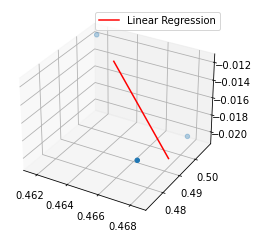

In [86]:
# 다중선형회귀 보간법 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = ju[['x', 'y', 'z']].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-300, 300, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.scatter(ju['x'],ju['y'],ju['z'])
ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'r', label='Linear Regression')
ax.legend()

plt.show()

In [92]:
linearReg[0,0].round(4) , linearReg[499,0].round(4)

(0.4631, 0.4676)

In [93]:
linearReg[0, 1].round(4) , linearReg[499,1].round(4)

(0.5037, 0.4905)

In [ ]:
# projection 


In [94]:
# 이미지에 라인 그리기 
import cv2
img = cv2.imread('KakaoTalk_20220811_120728313.jpg')
img = cv2.resize(img,(640,480))

In [ ]:
def calculate():
    a=round(linearReg[0][0]*640)
    b=round(linearReg[-1][0]*640)
    c=round(linearReg[0][1]*480)
    d=round(linearReg[-1][1]*480)
    return (a,c), (b,d)

In [99]:
ju_line = cv2.line(img,(640,242),(640,235),(0,0,255))
#cv2.flip(img,1)
cv2.imshow('Line',img)
cv2.waitKey()
cv2.destroyAllWindows()